# EJERCICIO #6

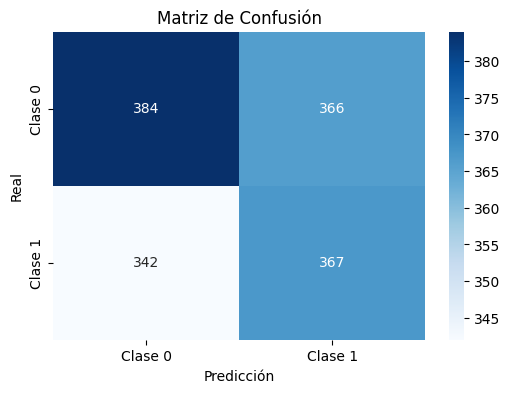

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.53      0.51      0.52       750
           1       0.50      0.52      0.51       709

    accuracy                           0.51      1459
   macro avg       0.51      0.51      0.51      1459
weighted avg       0.52      0.51      0.51      1459



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Cargar los datos (si es necesario)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Supongamos que ya tienes un modelo entrenado y las predicciones
# y_test son las clases reales, y_pred son las predicciones del modelo
# Reemplaza esto con tu código real de entrenamiento y predicción
y_test = np.random.choice([0, 1], size=len(test))  # Simulación de clases reales
y_pred = np.random.choice([0, 1], size=len(test))  # Simulación de predicciones

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Generar el reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


# EJERCICIO #7

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Cargar los datos (si es necesario)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Selección de características y variable objetivo
X_train = train.drop(columns=["SalePrice", "Id"])  # Excluyendo 'SalePrice' (variable objetivo) e 'Id'
y_train = train["SalePrice"]

X_test = test.drop(columns=["Id"])  # Excluyendo 'Id'
# Como no tenemos la variable objetivo para 'test', realizaremos una predicción

# Codificar las variables categóricas con One-Hot Encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Asegurarse de que ambos conjuntos de datos (entrenamiento y prueba) tengan las mismas columnas
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Dividir los datos en entrenamiento y validación
X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(X_train_encoded, y_train, test_size=0.2, random_state=42)

# Entrenamiento del modelo (por ejemplo, RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_split, y_train_split)

# Predicciones sobre el conjunto de entrenamiento y prueba
y_train_pred = model.predict(X_train_split)
y_valid_pred = model.predict(X_valid_split)

# Evaluación del modelo: precisión y clasificación
train_accuracy = accuracy_score(y_train_split, y_train_pred)
valid_accuracy = accuracy_score(y_valid_split, y_valid_pred)

print("Precisión en entrenamiento:", train_accuracy)
print("Precisión en validación:", valid_accuracy)

# Si la diferencia es grande, podría indicar sobreajuste
if train_accuracy - valid_accuracy > 0.1:  # Umbral ejemplo de diferencia
    print("El modelo podría estar sobreajustado.")

# Reporte de clasificación para análisis más detallado
print("Reporte de clasificación en entrenamiento:")
print(classification_report(y_train_split, y_train_pred))

print("Reporte de clasificación en validación:")
print(classification_report(y_valid_split, y_valid_pred))



Precisión en entrenamiento: 1.0
Precisión en validación: 0.0136986301369863
El modelo podría estar sobreajustado.
Reporte de clasificación en entrenamiento:
              precision    recall  f1-score   support

       34900       1.00      1.00      1.00         1
       37900       1.00      1.00      1.00         1
       39300       1.00      1.00      1.00         1
       52000       1.00      1.00      1.00         1
       52500       1.00      1.00      1.00         1
       55000       1.00      1.00      1.00         2
       58500       1.00      1.00      1.00         1
       60000       1.00      1.00      1.00         2
       61000       1.00      1.00      1.00         1
       62383       1.00      1.00      1.00         1
       72500       1.00      1.00      1.00         1
       73000       1.00      1.00      1.00         1
       76000       1.00      1.00      1.00         1
       76500       1.00      1.00      1.00         1
       78000       1.00      1.0

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

# EJERCICIO 8

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Cargar los datos
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Selección de características y variable objetivo
X = train.drop(columns=["SalePrice", "Id"])
y = train["SalePrice"]
X_test = test.drop(columns=["Id"])

# Codificar las variables categóricas con One-Hot Encoding
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)

# Asegurar que los conjuntos de entrenamiento y prueba tengan las mismas columnas
X, X_test = X.align(X_test, join='left', axis=1, fill_value=0)

# Dividir los datos en entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo con validación cruzada
model = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)

# Evaluación con validación cruzada
print("MAE Promedio con Validación Cruzada:", -np.mean(scores))

# Entrenar el modelo final y hacer predicciones
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

# Evaluación final del modelo
mae = mean_absolute_error(y_valid, y_pred)
print("MAE en el conjunto de validación:", mae)


MAE Promedio con Validación Cruzada: 18394.651340853234
MAE en el conjunto de validación: 17615.422020547947


# EJERCICIO 9

# EJERCICIO 10